# Importing the libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()

# Reading in the test and train files 

In [102]:
test = pd.read_csv('test.csv')

In [103]:
train = pd.read_csv('train.csv')

In [104]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Exploratory Data Analysis

# Missing Data

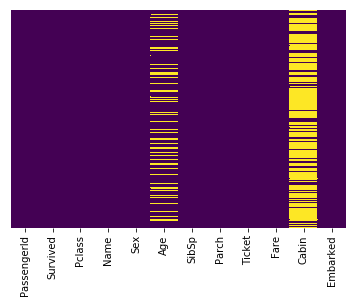

In [105]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing.
Looking at the Cabin column, we are just missing too much of that data to do something useful with it.

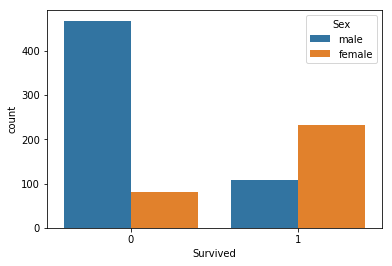

In [106]:
sns.countplot(x='Survived',data=train,hue='Sex')

After seeing the above graph, we can clearly say that women had a much higher survival rate than men.

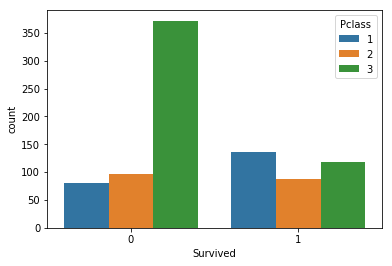

In [107]:
sns.countplot(x='Survived',data=train,hue='Pclass')

Most of the deceased people belonged to the third class of the ship. Hence the first and second class people were the first one's to be rescued.

In [108]:
train['Age'].iplot(kind='hist',bins=20,color='red')

Majority of the people aboard on the ship were inbetween the age group of 20-30 years old

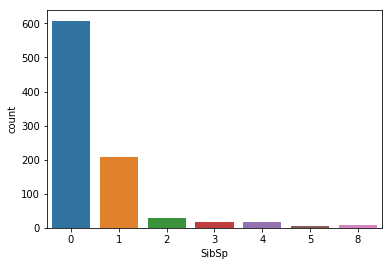

In [109]:
sns.countplot(x='SibSp',data=train)

Based on the above graph, most of the people on the ship were single which included mainly the working class.
The couples had the second best population.

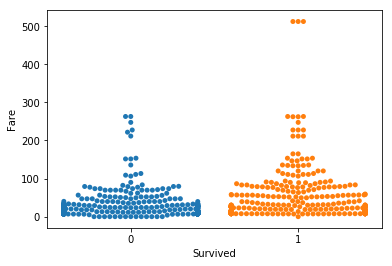

In [124]:
sns.swarmplot(x='Survived',y='Fare', data=train)


Generally those who paid more fare had a higher chance of survival.

In [110]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

Most of the people onboard had paid between around $20 for their tickets.

# Data Cleaning

Using imputation to fill in missing age data instead of just dropping the missing age data rows 

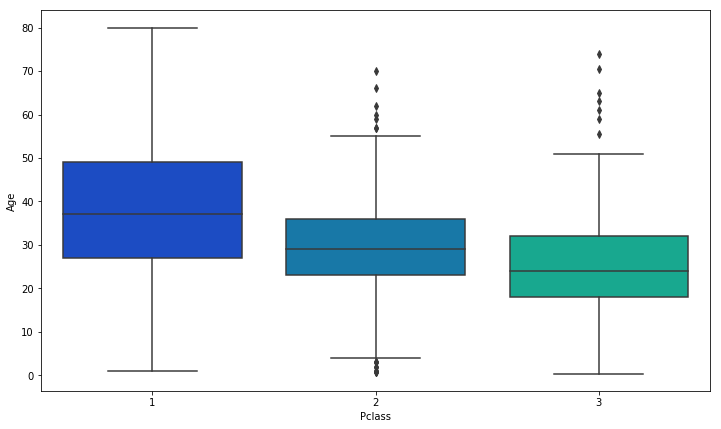

In [111]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The wealthier passengers in the higher classes tend to be older. Using these average age values to impute based on Pclass for Age.

In [112]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [113]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Checking that heat map again!

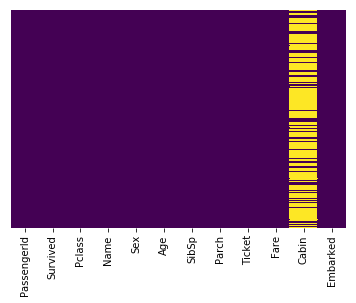

In [114]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [115]:
train.drop('Cabin',axis=1,inplace=True)

Dropped the cabin column completely

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [117]:
train.dropna(inplace=True)

# Converting Categorical Features

In [118]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [119]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [120]:
train = pd.concat([train,sex,embark],axis=1)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\UMAIR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
predictions = logmodel.predict(X_test)


# Evaluation 

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [66]:
from sklearn.metrics import confusion_matrix


In [67]:
print(confusion_matrix(y_test,predictions))

[[151  12]
 [ 36  68]]
